## Chatbots (The Chat Format)

We'll explore how you can utilize the chat format to have extended conversations with chatbots personalized to specialized for specific tasks or behaviors.

One of the cool things about LLM is that you can use it to build custom chatbots with only a modest amount of effort, eg play role of a custom AI service agent, AI order taker for a restaurant, 

In [2]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_KEY')

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

Chat models like ChatGPT, are actually trained to take a series of messages as input and return a model generator message as output.

So, far what we were using was somthing like user/promt message, means it is trained to take series of messages as input and return output.
The users message is the input and assistant message is the output.
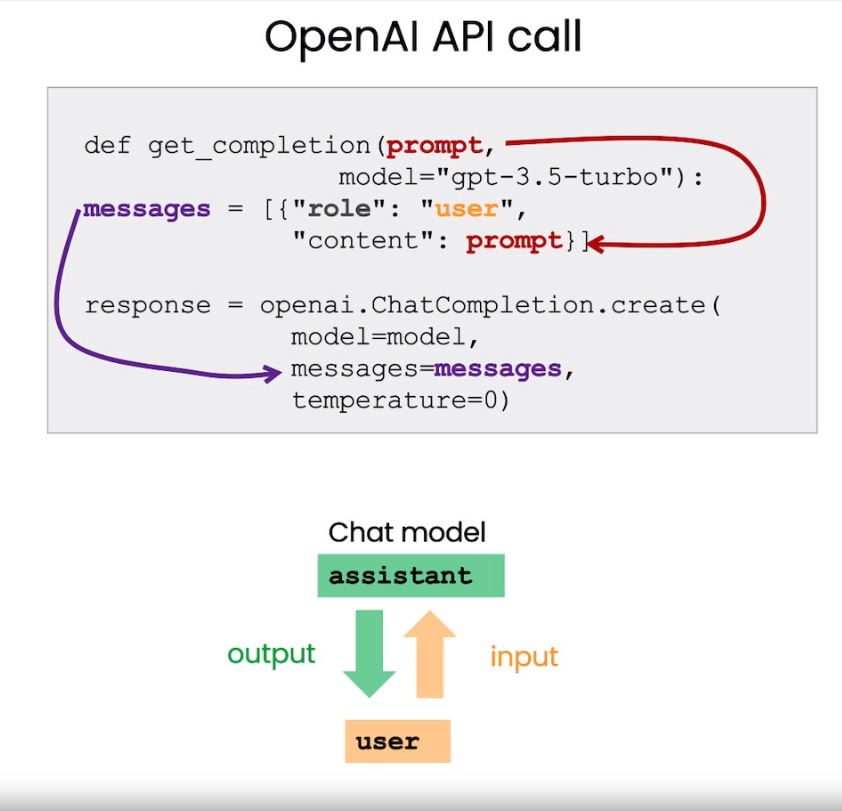

So, instead of using a single completing message, we are going to pass a list of messages, and it can be from a variety of different roles.
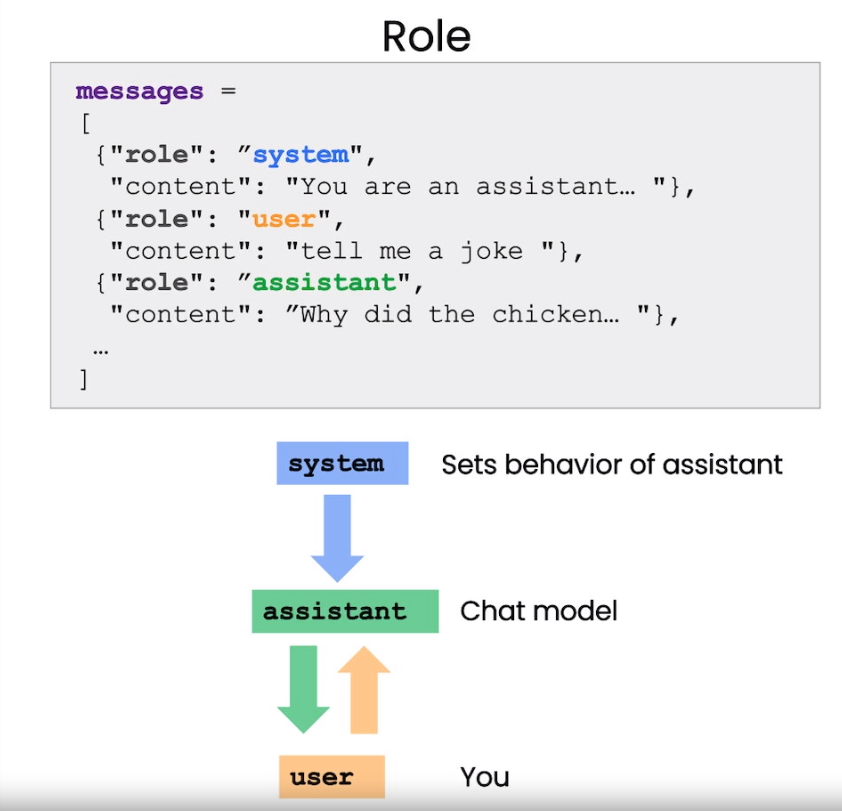

In [5]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    # This is us describing the system how it should behave
{'role':'user', 'content':'tell me a joke'},                                          # First user message
{'role':'assistant', 'content':'Why did the chicken cross the road'},                 # assistant question
{'role':'user', 'content':'I don\'t know'}                                            # final user message
]

In [6]:
response = get_completion_from_messages(messages, temperature=1)
print(response)

Verily, the chicken did cross the road to get to the other side, forsooth!


In [7]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Hello Isa! It's nice to meet you. How can I assist you today?


In [8]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

I apologize, but as a chatbot, I don't have access to personal information such as your name.


In [9]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Your name is Isa.


### OrderBot
We can automate the collection of user prompts and assistant response to build a OrderBot. The OrderBot will take orders at a pizza restaurant.
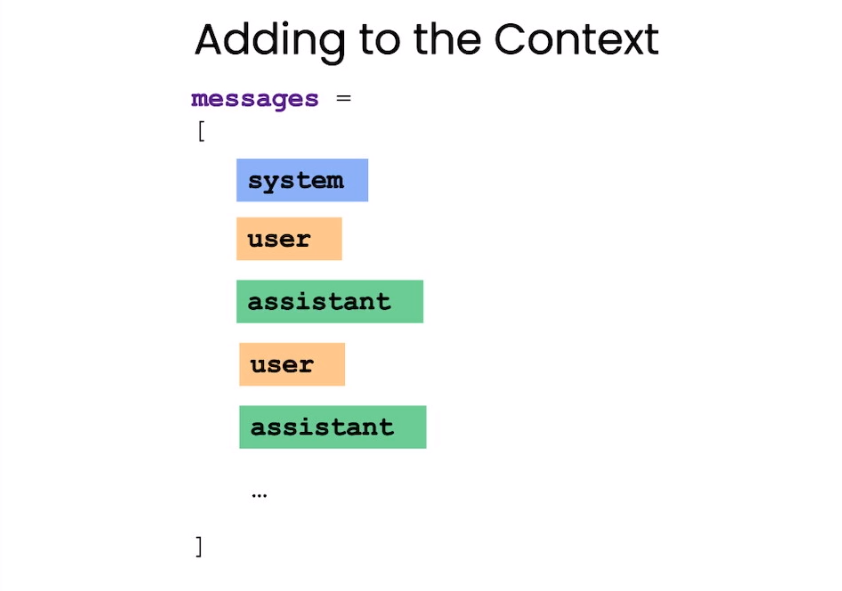

In [12]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)

In [13]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

/tmp/ipykernel_93750/3067100770.py:10: PanelDeprecationWarning: 'style' is deprecated and will be removed in version 1.3, use 'styles' instead.
  pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))


Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, defer_load=False, height=300, loading_indicator=True)

In [14]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

response = get_completion_from_messages(messages, temperature=0)
print(response)

Sure! Here's a JSON summary of your food order:

{
  "pizza": {
    "size": "12.95",
    "toppings": ["extra cheese", "mushrooms"]
  },
  "drinks": [
    {
      "name": "coke",
      "size": "3.00"
    },
    {
      "name": "sprite",
      "size": "2.00"
    }
  ],
  "sides": [
    {
      "name": "fries",
      "size": "4.50"
    }
  ],
  "total_price": "25.45"
}

Please let me know if there's anything else you'd like to add to your order!
